## <center>The Sparks Foundation</center>
### <center>TASK #6 - Prediction using Decision Tree Algorithm</center>
### <center>Domain : Data Science and Business Analytics</center>
### <center>Author : Akshay Pandurang Paunikar</center>

#### Objective:
    1. Create the Decision Tree Classifier and Visualize it.
    2. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [21]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree

In [22]:
# Set working directory
import io
%cd "E:\TSF-INTERN\TSF-INTERN Tasks\Task#6"

E:\TSF-INTERN\TSF-INTERN Tasks\Task#6


In [23]:
# Load the data into dataframe
iris = pd.read_csv('Iris.csv')

In [24]:
# view first 5 records from iris dataframe
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# check dimensions of iris data
iris.shape

(150, 6)

In [26]:
# check datatypes present in our data
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [27]:
# Descriptive Statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
# get concise summary of dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
# check for any null/missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null/missing values in our data

Now we will drop the "Id" column as it is not necessary for our analysis

In [30]:
# dropping Id column
iris = iris.drop('Id',axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# separate data into independent(X) and dependent(y) varialbles
X = iris.drop('Species',axis=1)
y = iris.Species

In [32]:
# creating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Decision Tree Classifier

In [33]:
# initialize Decision Tree Classifier
model = DecisionTreeClassifier()

In [34]:
# fit the training data to our model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
# check the score of the model
model.score(X_train,y_train)

1.0

In [36]:
# let's predict on our test data
y_pred = model.predict(X_test)

In [37]:
# Now let's evaluate our model

# confusion matrix
print("Confusion Matrix :\n", confusion_matrix(y_test,y_pred))

# accuracy score
print("Accuracy Score :\n", accuracy_score(y_test,y_pred))

# classification report
print("Classification Report :\n", classification_report(y_test,y_pred))

Confusion Matrix :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score :
 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [38]:
# Now we will fit the Decision tree on X and y data
model.fit(X,y)

DecisionTreeClassifier()

In [39]:
model.score(X,y)

1.0

### Let's visualize our Decision tree

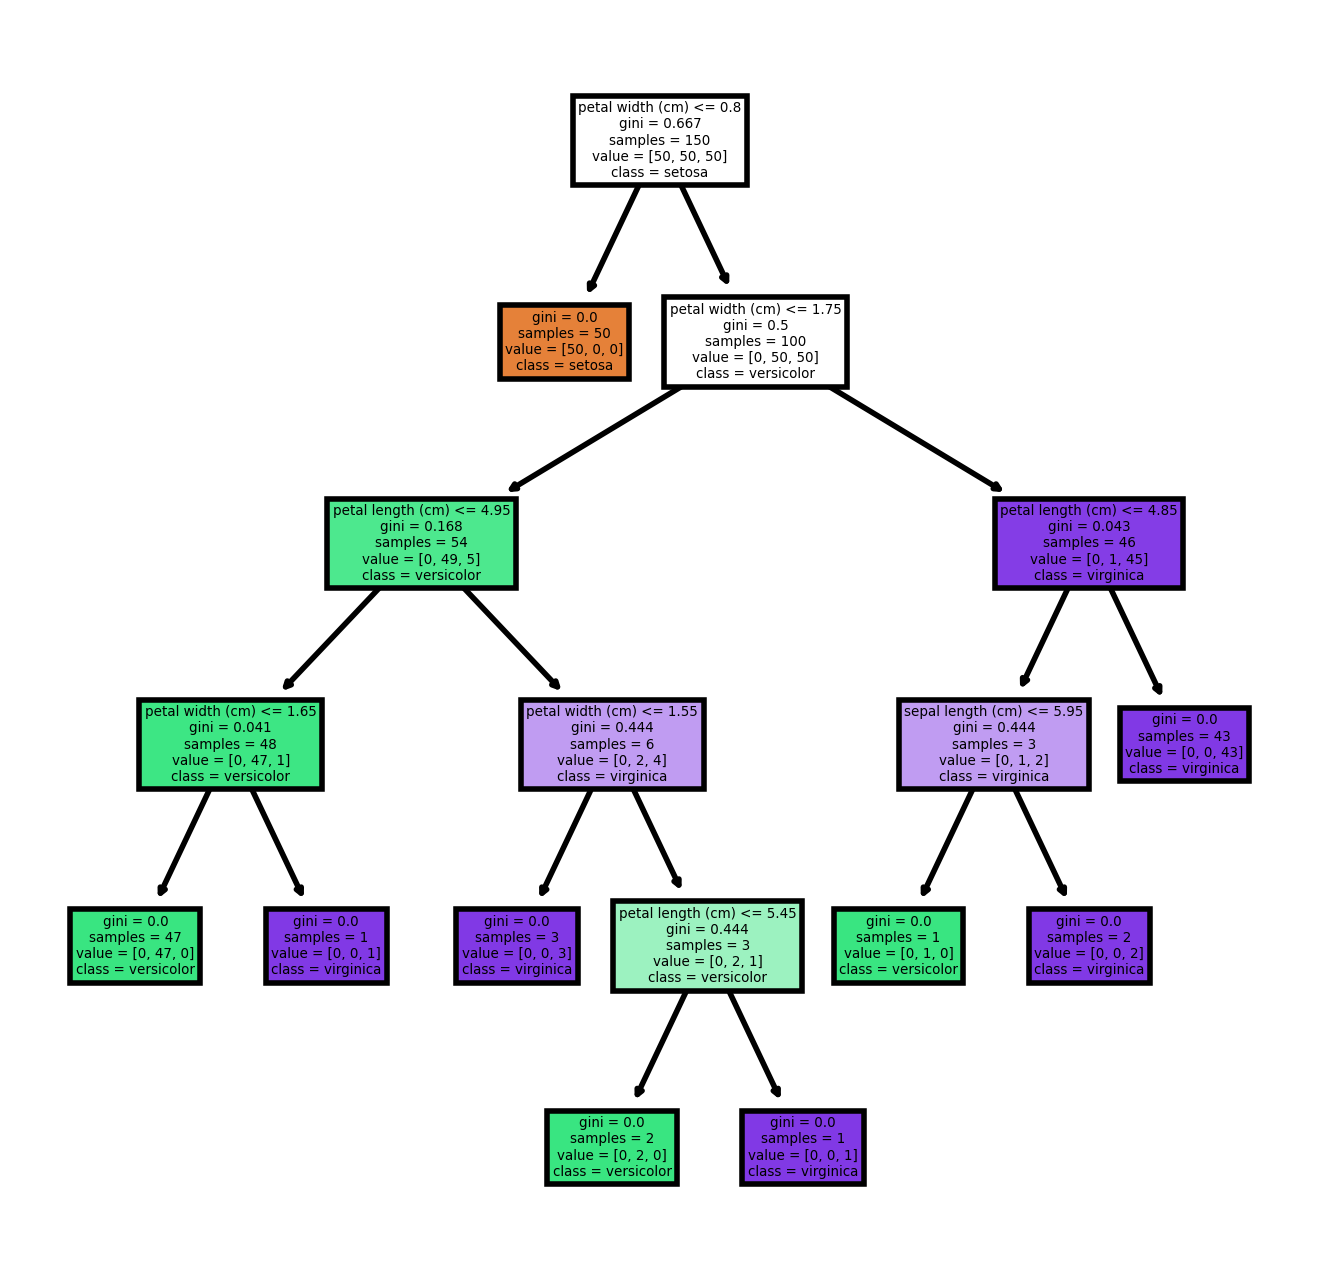

In [40]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('DecisionTreeIris.png')